# Phase 1 & 2: Data Loading, Cleaning, and Exploratory Data Analysis (EDA)

This notebook covers:
- **Phase 1**: Environment setup and data inspection
- **Phase 2**: Data cleaning, preprocessing, and exploratory data analysis
- **Focus**: Understanding the dataset through descriptive statistics, visualizations, and data quality assessment

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
import os
from scipy import stats
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create figures directory for paper
os.makedirs('figures', exist_ok=True)
print("Figures directory created/verified. All figures will be saved to 'figures/' folder.")

Figures directory created/verified. All figures will be saved to 'figures/' folder.


## Phase 1.2: Load and Inspect Data

In [2]:
# Load the dataset
df = pd.read_csv('data/Data Science Dataset - DATABASE.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (89, 15)

First few rows:


,Date,Day of the Week,Sleep_Hours,Work_Hours,Study_Hours,Chore_Time_Mins,Distraction_Time_Mins,Travel Time (Hours),Mode of Transport,Music_Time_Hours,Main_Music_Genre,Tasks_Completed,Mood_Rating,Focus_Rating,Notes
0,11-19-25,Wed,5.0,10,3.000000,65,127,2.80,Public Transport,2,"Pop, R&B",8,4,3,"Done finishing admin, Need to layout design sa..."
1,11-20-25,Thu,5.5,7,5.000000,60,252,1.30,"Public Transport, Motorcycle",1,"Pop, News, Jazz",4,3,4,"maraming gagawin sa shop, deliveries, payroll,..."
2,11-21-25,Fri,6.0,9,4.000000,60,174,1.10,Public Transport,2,"Jazz, Classical",5,5,2,"Reformat PC, create designs and payroll ng tao"
3,11-22-25,Sat,6.0,3,7.516667,20,270,2.65,"Public Transport, Motorcycle",1,"Jazz, Lofi",4,5,2,NaN
4,11-23-25,Sun,3.0,4,10.100000,60,270,1.40,Public Transport,4,"Classical, Jazz, News, Rock",10,4,5,"Done house clean, PC clean, Repairs, Stocks re..."


In [ ]:
# Filter to 89-day period: Nov 19, 2025 - Feb 15, 2026 (per DATABASE.csv)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
start_date = pd.to_datetime('2025-11-19')
end_date = pd.to_datetime('2026-02-15')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df = df.sort_values('Date').reset_index(drop=True)
print(f"Filtered to {len(df)} days from {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
assert len(df) == 89, f"Expected 89 days but got {len(df)}"

Filtered to 89 days from 2025-11-19 to 2026-02-15


In [4]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*80)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*80)
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   89 non-null     datetime64[ns]
 1   Day of the Week        89 non-null     object        
 2   Sleep_Hours            89 non-null     float64       
 3   Work_Hours             89 non-null     int64         
 4   Study_Hours            89 non-null     float64       
 5   Chore_Time_Mins        89 non-null     int64         
 6   Distraction_Time_Mins  89 non-null     int64         
 7   Travel Time (Hours)    89 non-null     float64       
 8   Mode of Transport      89 non-null     object        
 9   Music_Time_Hours       89 non-null     int64         
 10  Main_Music_Genre       88 non-null     object        
 11  Tasks_Completed        89 non-null     int64         
 12  Mood_Rating            89 non-null     int64        

,Date,Sleep_Hours,Work_Hours,Study_Hours,Chore_Time_Mins,Distraction_Time_Mins,Travel Time (Hours),Music_Time_Hours,Tasks_Completed,Mood_Rating,Focus_Rating
count,89,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2026-01-02 00:00:00,6.915730,4.943820,4.675468,102.168539,253.359551,1.703371,4.977528,3.820225,3.404494,3.280899
min,2025-11-19 00:00:00,2.000000,0.000000,0.000000,19.000000,70.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2025-12-11 00:00:00,6.000000,1.000000,3.000000,45.000000,200.000000,1.100000,3.000000,3.000000,2.000000,2.000000
50%,2026-01-02 00:00:00,7.000000,7.000000,4.700000,70.000000,240.000000,1.400000,5.000000,3.000000,4.000000,3.000000
75%,2026-01-24 00:00:00,8.000000,8.000000,6.000000,100.000000,300.000000,2.500000,7.000000,5.000000,4.000000,4.000000
max,2026-02-15 00:00:00,12.000000,10.000000,11.733333,480.000000,500.000000,3.000000,13.000000,10.000000,5.000000,5.000000
std,NaN,1.795253,3.341745,2.381374,91.075548,85.142294,0.731584,2.816258,1.874238,1.073642,1.243060


## Phase 2.1: Handle Missing Values

In [5]:
# Drop rows with missing dates (per methodology)
print(f"Rows before dropping missing dates: {len(df)}")
df = df.dropna(subset=['Date'])
print(f"Rows after dropping missing dates: {len(df)}")

# Check for rows with all NaN values (completely empty rows)
empty_rows = df[df.isnull().all(axis=1)]
print(f"Completely empty rows: {len(empty_rows)}")
if len(empty_rows) > 0:
    df = df.dropna(how='all')
    print(f"Rows after dropping completely empty rows: {len(df)}")

Rows before dropping missing dates: 89
Rows after dropping missing dates: 89
Completely empty rows: 0


In [6]:
# Identify numeric columns for imputation
numeric_columns = ['Sleep_Hours', 'Work_Hours', 'Study_Hours', 'Chore_Time_Mins', 
                   'Distraction_Time_Mins', 'Travel Time (Hours)', 'Music_Time_Hours', 
                   'Tasks_Completed', 'Mood_Rating', 'Focus_Rating']

# Log missing values before imputation
missing_before = df[numeric_columns].isnull().sum()
print("Missing values before imputation:")
print(missing_before[missing_before > 0])

# Impute missing numeric values with 0 (per methodology)
df[numeric_columns] = df[numeric_columns].fillna(0)

# Verify imputation
missing_after = df[numeric_columns].isnull().sum()
print("\nMissing values after imputation:")
print(missing_after[missing_after > 0])

Missing values before imputation:
Series([], dtype: int64)

Missing values after imputation:
Series([], dtype: int64)


## Phase 2.2: Parse and Validate Dates

In [7]:
# Parse Date column to datetime
# Format appears to be MM-DD-YY
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Validate Day of the Week against computed weekday
df['Computed_Day'] = df['Date'].dt.day_name()
df['Day_Match'] = df['Day of the Week'] == df['Computed_Day']

# Check for mismatches
mismatches = df[~df['Day_Match']]
if len(mismatches) > 0:
    print(f"Found {len(mismatches)} date/day mismatches:")
    print(mismatches[['Date', 'Day of the Week', 'Computed_Day']])
else:
    print("All dates match their day of the week!")

# Add Is_Weekend column for "Weekend Bleed" hypothesis
df['Is_Weekend'] = df['Date'].dt.dayofweek.isin([5, 6])  # Saturday=5, Sunday=6

print(f"\nWeekend days: {df['Is_Weekend'].sum()}")
print(f"Weekday days: {(~df['Is_Weekend']).sum()}")

Found 89 date/day mismatches:
         Date Day of the Week Computed_Day
0  2025-11-19             Wed    Wednesday
1  2025-11-20             Thu     Thursday
2  2025-11-21             Fri       Friday
3  2025-11-22             Sat     Saturday
4  2025-11-23             Sun       Sunday
..        ...             ...          ...
84 2026-02-11             Wed    Wednesday
85 2026-02-12             Thu     Thursday
86 2026-02-13             Fri       Friday
87 2026-02-14             Sat     Saturday
88 2026-02-15             Sun       Sunday

[89 rows x 3 columns]

Weekend days: 26
Weekday days: 63


## Phase 2.3: Handle Categorical Variables

In [8]:
# Explore categorical variables
print("Mode of Transport unique values:")
print(df['Mode of Transport'].value_counts())
print("\nMain_Music_Genre unique values:")
print(df['Main_Music_Genre'].value_counts())

# Fill missing values in categorical columns with empty string for processing
df['Mode of Transport'] = df['Mode of Transport'].fillna('')
df['Main_Music_Genre'] = df['Main_Music_Genre'].fillna('')

Mode of Transport unique values:
Mode of Transport
Public Transport                57
Public Transport, Motorcycle    32
Name: count, dtype: int64

Main_Music_Genre unique values:
Main_Music_Genre
Lofi                           10
Pop                             8
R&B                             6
Oldies                          5
Classical                       5
Rock                            5
Jazz                            5
Pop, R&B                        3
R&B, News                       3
Pop, Rock                       3
News                            2
Podcast                         2
Jazz, News                      2
Lofi, Pop                       2
Pop, News, Jazz                 1
Jazz, Classical                 1
Classical, Jazz, News, Rock     1
R&B, Rock                       1
Pop, Podcast                    1
Jazz, Lofi                      1
Lofi, R&B                       1
Podcast, News, Pop              1
Pop, Classical, Jazz            1
Jazz, News, Podcast  

## Phase 2.3.1: Encode Categorical Variables to Numerical

Convert text/categorical data to numerical format for normalization and clustering.

In [9]:
# Encode Mode of Transport using one-hot encoding
# Split comma-separated values and create binary columns
transport_modes = set()
for transport_str in df['Mode of Transport'].dropna():
    if pd.notna(transport_str) and transport_str.strip():
        modes = [m.strip() for m in str(transport_str).split(',')]
        transport_modes.update(modes)

print("Unique Transport Modes found:", sorted(transport_modes))

# Create one-hot encoded columns for each transport mode
for mode in transport_modes:
    col_name = f'Transport_{mode.replace(" ", "_")}'
    df[col_name] = df['Mode of Transport'].apply(
        lambda x: 1 if pd.notna(x) and mode in str(x) else 0
    )

transport_encoded_cols = [f'Transport_{mode.replace(" ", "_")}' for mode in transport_modes]
print(f"\nCreated {len(transport_encoded_cols)} transport encoding columns:")
print(transport_encoded_cols)

Unique Transport Modes found: ['Motorcycle', 'Public Transport']

Created 2 transport encoding columns:
['Transport_Motorcycle', 'Transport_Public_Transport']


In [10]:
# Encode Main_Music_Genre using one-hot encoding
# Split comma-separated values and create binary columns
music_genres = set()
for genre_str in df['Main_Music_Genre'].dropna():
    if pd.notna(genre_str) and genre_str.strip():
        genres = [g.strip() for g in str(genre_str).split(',')]
        music_genres.update(genres)

print("Unique Music Genres found:", sorted(music_genres))

# Create one-hot encoded columns for each music genre
for genre in music_genres:
    col_name = f'Genre_{genre.replace(" ", "_").replace("&", "and")}'
    df[col_name] = df['Main_Music_Genre'].apply(
        lambda x: 1 if pd.notna(x) and genre in str(x) else 0
    )

genre_encoded_cols = [f'Genre_{genre.replace(" ", "_").replace("&", "and")}' for genre in music_genres]
print(f"\nCreated {len(genre_encoded_cols)} genre encoding columns:")
print(genre_encoded_cols)

# Show summary
print(f"\nTotal encoded categorical columns: {len(transport_encoded_cols) + len(genre_encoded_cols)}")
print(f"  - Transport modes: {len(transport_encoded_cols)}")
print(f"  - Music genres: {len(genre_encoded_cols)}")

Unique Music Genres found: ['Classical', 'EDM', 'Jazz', 'Lofi', 'News', 'OPM', 'Oldies', 'Podcast', 'Pop', 'R&B', 'Rock']

Created 11 genre encoding columns:
['Genre_Pop', 'Genre_Jazz', 'Genre_OPM', 'Genre_News', 'Genre_Classical', 'Genre_Podcast', 'Genre_EDM', 'Genre_Lofi', 'Genre_Oldies', 'Genre_RandB', 'Genre_Rock']

Total encoded categorical columns: 13
  - Transport modes: 2
  - Music genres: 11


## Phase 2.4: Feature Selection for Clustering

In [11]:

# Inputs: Sleep_Hours, Music_Time_Hours, Travel Time (Hours)
# Behaviors: Work_Hours, Study_Hours, Chore_Time_Mins, Distraction_Time_Mins, Tasks_Completed
# Categorical (encoded): Transport modes and Music genres (optional)

clustering_features = [
    'Sleep_Hours',           # Input
    'Music_Time_Hours',      # Input
    'Travel Time (Hours)',   # Input
    'Work_Hours',            # Behavior
    'Study_Hours',           # Behavior
    'Chore_Time_Mins',       # Behavior
    'Distraction_Time_Mins', # Behavior
    'Tasks_Completed'        # Behavior
]

# Option to include encoded categorical features in clustering
# Uncomment the line below want to include transport and genre in clustering
# clustering_features.extend(transport_encoded_cols + genre_encoded_cols)

# Create feature matrix for clustering
X = df[clustering_features].copy()

# Targets (excluded from clustering, used for validation)
targets = ['Mood_Rating', 'Focus_Rating']

print("Features selected for clustering:")
print(clustering_features)
print(f"\nFeature matrix shape: {X.shape}")
print("\nFeature statistics:")
X.describe()

Features selected for clustering:
['Sleep_Hours', 'Music_Time_Hours', 'Travel Time (Hours)', 'Work_Hours', 'Study_Hours', 'Chore_Time_Mins', 'Distraction_Time_Mins', 'Tasks_Completed']

Feature matrix shape: (89, 8)

Feature statistics:


,Sleep_Hours,Music_Time_Hours,Travel Time (Hours),Work_Hours,Study_Hours,Chore_Time_Mins,Distraction_Time_Mins,Tasks_Completed
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,6.915730,4.977528,1.703371,4.943820,4.675468,102.168539,253.359551,3.820225
std,1.795253,2.816258,0.731584,3.341745,2.381374,91.075548,85.142294,1.874238
min,2.000000,0.000000,1.000000,0.000000,0.000000,19.000000,70.000000,0.000000
25%,6.000000,3.000000,1.100000,1.000000,3.000000,45.000000,200.000000,3.000000
50%,7.000000,5.000000,1.400000,7.000000,4.700000,70.000000,240.000000,3.000000
75%,8.000000,7.000000,2.500000,8.000000,6.000000,100.000000,300.000000,5.000000
max,12.000000,13.000000,3.000000,10.000000,11.733333,480.000000,500.000000,10.000000


## Phase 2.5: Scaling

In [12]:
# Normalize encoded categorical features (if you want to include them)
# Note: One-hot encoded features are already 0/1, but we can still scale them
# for consistency with other features

if len(transport_encoded_cols) > 0 or len(genre_encoded_cols) > 0:
    categorical_features = transport_encoded_cols + genre_encoded_cols
    X_categorical = df[categorical_features].copy()
    
    # Apply StandardScaler to categorical features
    scaler_categorical = StandardScaler()
    X_categorical_scaled = scaler_categorical.fit_transform(X_categorical)
    X_categorical_scaled_df = pd.DataFrame(
        X_categorical_scaled, 
        columns=categorical_features, 
        index=X_categorical.index
    )
    
    print("Normalized categorical features:")
    print(f"  Shape: {X_categorical_scaled_df.shape}")
    print(f"  Mean: {X_categorical_scaled_df.mean().mean():.6f}")
    print(f"  Std: {X_categorical_scaled_df.std().mean():.6f}")
    
    # Option to combine with main features
    # Uncomment if you want to include categorical features in clustering
    # X_combined = pd.concat([X_scaled_df, X_categorical_scaled_df], axis=1)
    # print(f"\nCombined feature matrix shape: {X_combined.shape}")
else:
    print("No categorical features to normalize.")

Normalized categorical features:
  Shape: (89, 13)
  Mean: 0.000000
  Std: 0.928307


In [13]:
# Apply StandardScaler (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features, index=X.index)

print("Scaled feature matrix statistics:")
print(X_scaled_df.describe())
print("\nScaled feature means (should be ~0):")
print(X_scaled_df.mean())
print("\nScaled feature std (should be ~1):")
print(X_scaled_df.std())

Scaled feature matrix statistics:
        Sleep_Hours  Music_Time_Hours  Travel Time (Hours)    Work_Hours  \
count  8.900000e+01      8.900000e+01         8.900000e+01  8.900000e+01   
mean  -2.083227e-16     -1.571776e-16        -2.756846e-16  1.297339e-16   
std    1.005666e+00      1.005666e+00         1.005666e+00  1.005666e+00   
min   -2.753697e+00     -1.777440e+00        -9.668821e-01 -1.487795e+00   
25%   -5.129744e-01     -7.061613e-01        -8.294181e-01 -1.186854e+00   
50%    4.720624e-02      8.024561e-03        -4.170258e-01  6.187873e-01   
75%    6.073869e-01      7.222105e-01         1.095079e+00  9.197276e-01   
max    2.848110e+00      2.864768e+00         1.782399e+00  1.521608e+00   

        Study_Hours  Chore_Time_Mins  Distraction_Time_Mins  Tasks_Completed  
count  8.900000e+01     8.900000e+01           8.900000e+01     8.900000e+01  
mean  -1.347237e-16    -5.059935e-17          -7.391091e-17     4.989766e-18  
std    1.005666e+00     1.005666e+00        

## Phase 2.6: Normalize Encoded Categorical Features 


In [14]:
# Normalize encoded categorical features 
# Note: One-hot encoded features are already 0/1, but we can still scale them
# for consistency with other features

if 'transport_encoded_cols' in locals() and 'genre_encoded_cols' in locals():
    if len(transport_encoded_cols) > 0 or len(genre_encoded_cols) > 0:
        categorical_features = transport_encoded_cols + genre_encoded_cols
        X_categorical = df[categorical_features].copy()
        
        # Apply StandardScaler to categorical features
        scaler_categorical = StandardScaler()
        X_categorical_scaled = scaler_categorical.fit_transform(X_categorical)
        X_categorical_scaled_df = pd.DataFrame(
            X_categorical_scaled, 
            columns=categorical_features, 
            index=X_categorical.index
        )
        
        print("Normalized categorical features:")
        print(f"  Shape: {X_categorical_scaled_df.shape}")
        print(f"  Mean: {X_categorical_scaled_df.mean().mean():.6f}")
        print(f"  Std: {X_categorical_scaled_df.std().mean():.6f}")
        
        # Option to combine with main features
        # Uncomment if  want to include categorical features in clustering
        # X_combined = pd.concat([X_scaled_df, X_categorical_scaled_df], axis=1)
        # print(f"\nCombined feature matrix shape: {X_combined.shape}")
    else:
        print("No categorical features to normalize.")
else:
    print("Categorical features not yet encoded. Run encoding cells first.")

Normalized categorical features:
  Shape: (89, 13)
  Mean: 0.000000
  Std: 0.928307


## Save Processed Data

Save the cleaned and scaled data for use in subsequent notebooks.

In [15]:
# Save processed data
# Save cleaned dataframe
df.to_csv('data/cleaned_data.csv', index=False)

# Save scaled features
X_scaled_df.to_csv('data/scaled_features.csv', index=False)

# Save feature names and targets for reference
import json
metadata = {
    'clustering_features': clustering_features,
    'targets': targets,
    'n_samples': len(df)
}
with open('data/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Processed data saved successfully!")
print(f"- Cleaned data: data/cleaned_data.csv ({len(df)} rows)")
print(f"- Scaled features: data/scaled_features.csv")
print(f"- Metadata: data/metadata.json")

Processed data saved successfully!
- Cleaned data: data/cleaned_data.csv (89 rows)
- Scaled features: data/scaled_features.csv
- Metadata: data/metadata.json


## Phase 2.7: Distribution Analysis - Histograms

Create histograms for all numerical variables to understand their distributions.

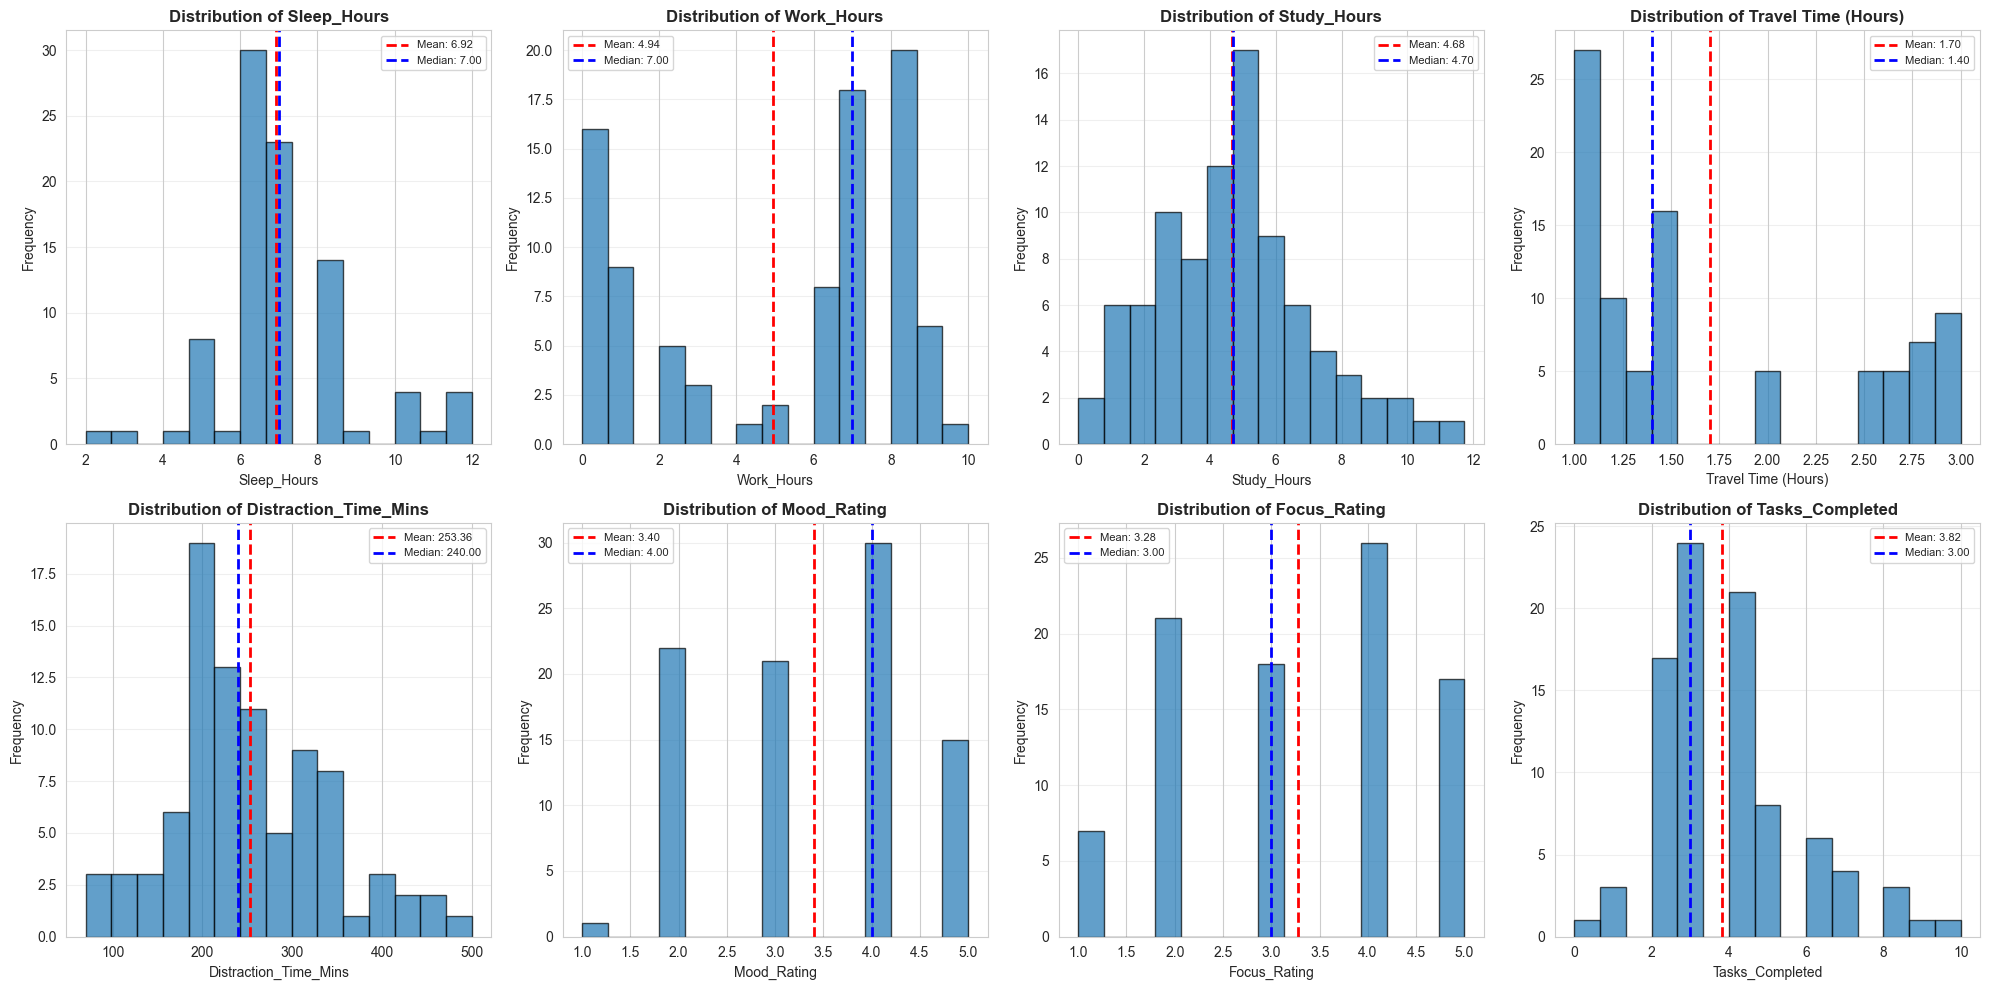

Histograms created and saved to figures/Figure_1_Histograms_All_Variables.png


In [16]:
# Define numerical variables for histograms
numerical_vars = ['Sleep_Hours', 'Work_Hours', 'Study_Hours', 'Travel Time (Hours)', 
                  'Distraction_Time_Mins', 'Mood_Rating', 'Focus_Rating', 'Tasks_Completed']

# Create histograms for each numerical variable
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]
    df[var].hist(bins=15, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics text
    mean_val = df[var].mean()
    median_val = df[var].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig('figures/Figure_1_Histograms_All_Variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histograms created and saved to figures/Figure_1_Histograms_All_Variables.png")

## Phase 2.8: Time Series Analysis

Analyze trends over the 81-day period for key variables.

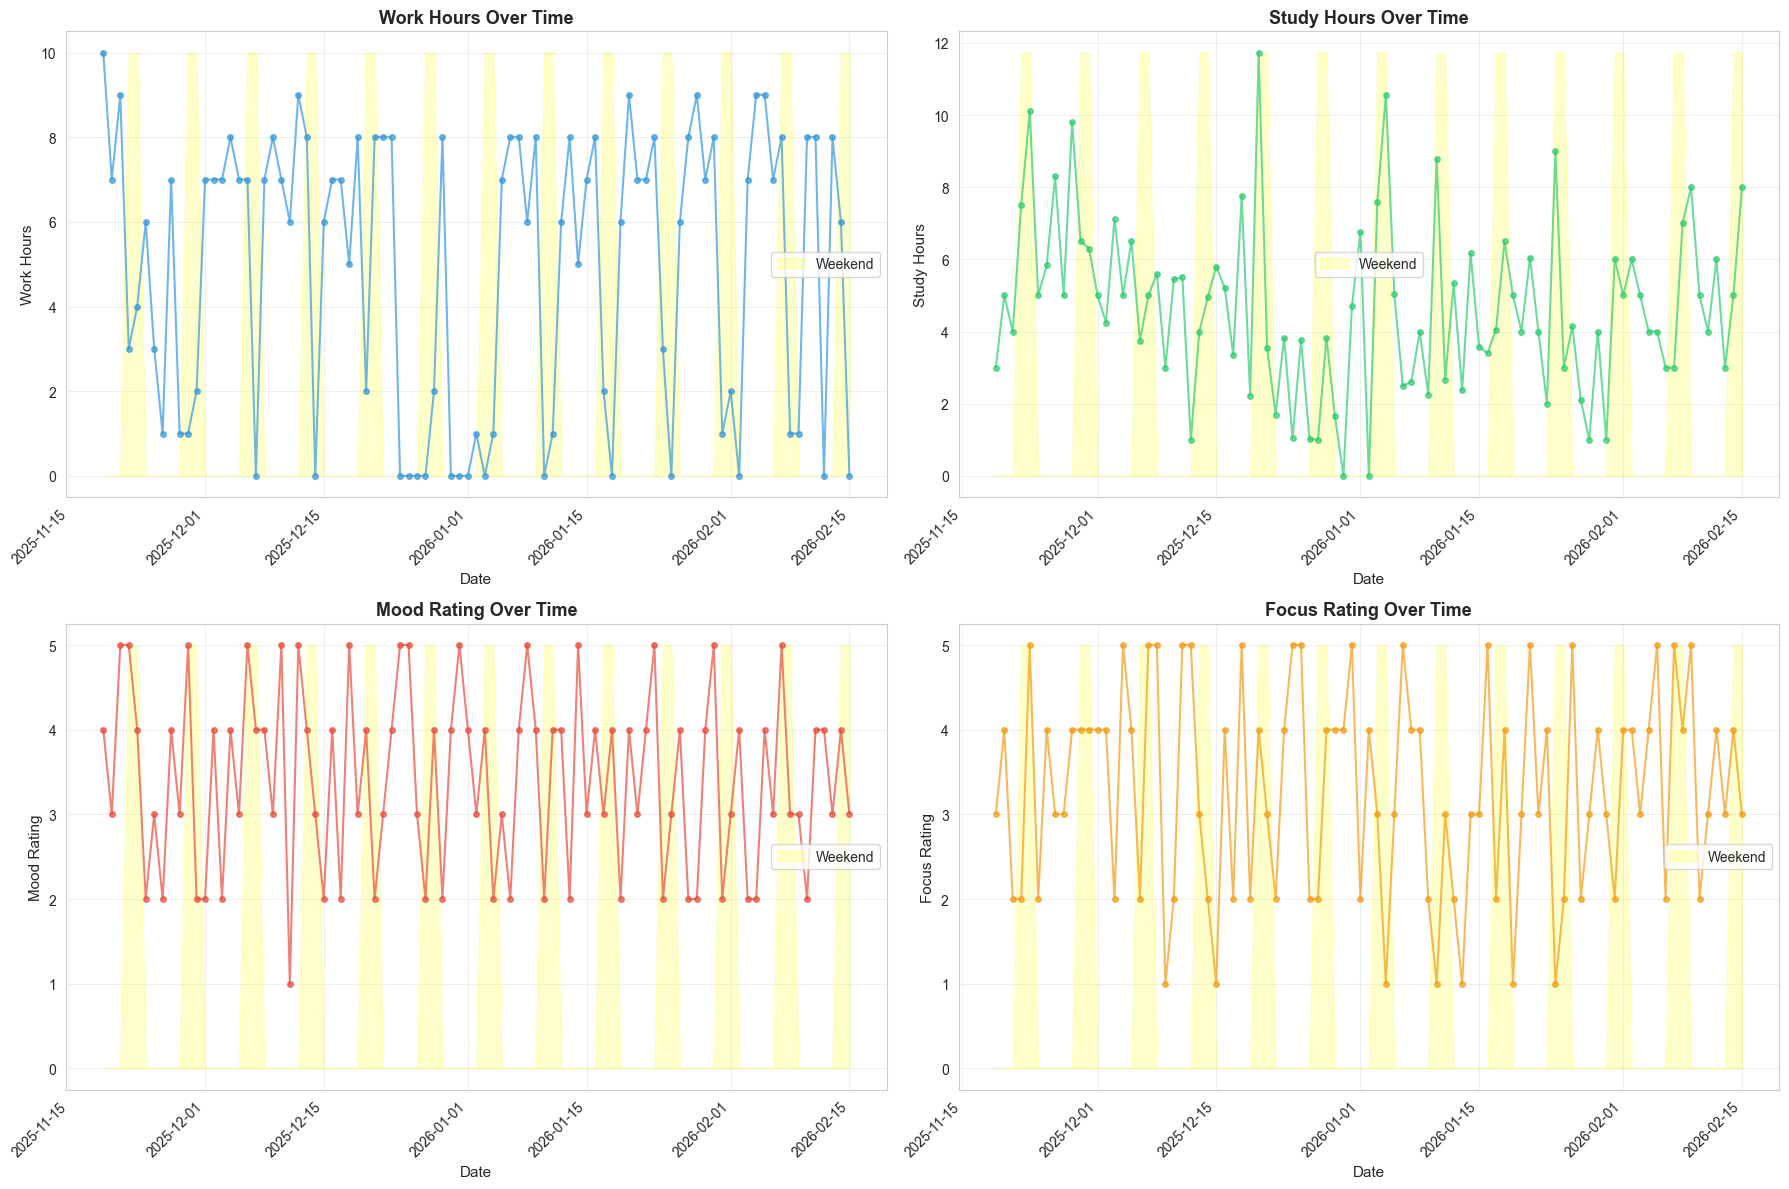

Time series plots created and saved to figures/Figure_2_Time_Series_Trends.png


In [17]:
# Ensure Date is datetime
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df_sorted = df.sort_values('Date').copy()

# Create time series plots for key variables
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Work_Hours over time
axes[0, 0].plot(df_sorted['Date'], df_sorted['Work_Hours'], marker='o', markersize=4, 
                linestyle='-', linewidth=1.5, color='#3498db', alpha=0.7)
axes[0, 0].fill_between(df_sorted['Date'], 0, df_sorted['Is_Weekend'].astype(int) * df_sorted['Work_Hours'].max(), 
                        alpha=0.2, color='yellow', label='Weekend')
axes[0, 0].set_title('Work Hours Over Time', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=11)
axes[0, 0].set_ylabel('Work Hours', fontsize=11)
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2: Study_Hours over time
axes[0, 1].plot(df_sorted['Date'], df_sorted['Study_Hours'], marker='o', markersize=4, 
                linestyle='-', linewidth=1.5, color='#2ecc71', alpha=0.7)
axes[0, 1].fill_between(df_sorted['Date'], 0, df_sorted['Is_Weekend'].astype(int) * df_sorted['Study_Hours'].max(), 
                        alpha=0.2, color='yellow', label='Weekend')
axes[0, 1].set_title('Study Hours Over Time', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=11)
axes[0, 1].set_ylabel('Study Hours', fontsize=11)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 3: Mood_Rating over time
axes[1, 0].plot(df_sorted['Date'], df_sorted['Mood_Rating'], marker='o', markersize=4, 
                linestyle='-', linewidth=1.5, color='#e74c3c', alpha=0.7)
axes[1, 0].fill_between(df_sorted['Date'], 0, df_sorted['Is_Weekend'].astype(int) * df_sorted['Mood_Rating'].max(), 
                        alpha=0.2, color='yellow', label='Weekend')
axes[1, 0].set_title('Mood Rating Over Time', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=11)
axes[1, 0].set_ylabel('Mood Rating', fontsize=11)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend()
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: Focus_Rating over time
axes[1, 1].plot(df_sorted['Date'], df_sorted['Focus_Rating'], marker='o', markersize=4, 
                linestyle='-', linewidth=1.5, color='#f39c12', alpha=0.7)
axes[1, 1].fill_between(df_sorted['Date'], 0, df_sorted['Is_Weekend'].astype(int) * df_sorted['Focus_Rating'].max(), 
                        alpha=0.2, color='yellow', label='Weekend')
axes[1, 1].set_title('Focus Rating Over Time', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Date', fontsize=11)
axes[1, 1].set_ylabel('Focus Rating', fontsize=11)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend()
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figures/Figure_2_Time_Series_Trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Time series plots created and saved to figures/Figure_2_Time_Series_Trends.png")

## Phase 2.9: Correlation Analysis

Calculate and visualize correlation matrix for all numerical variables.

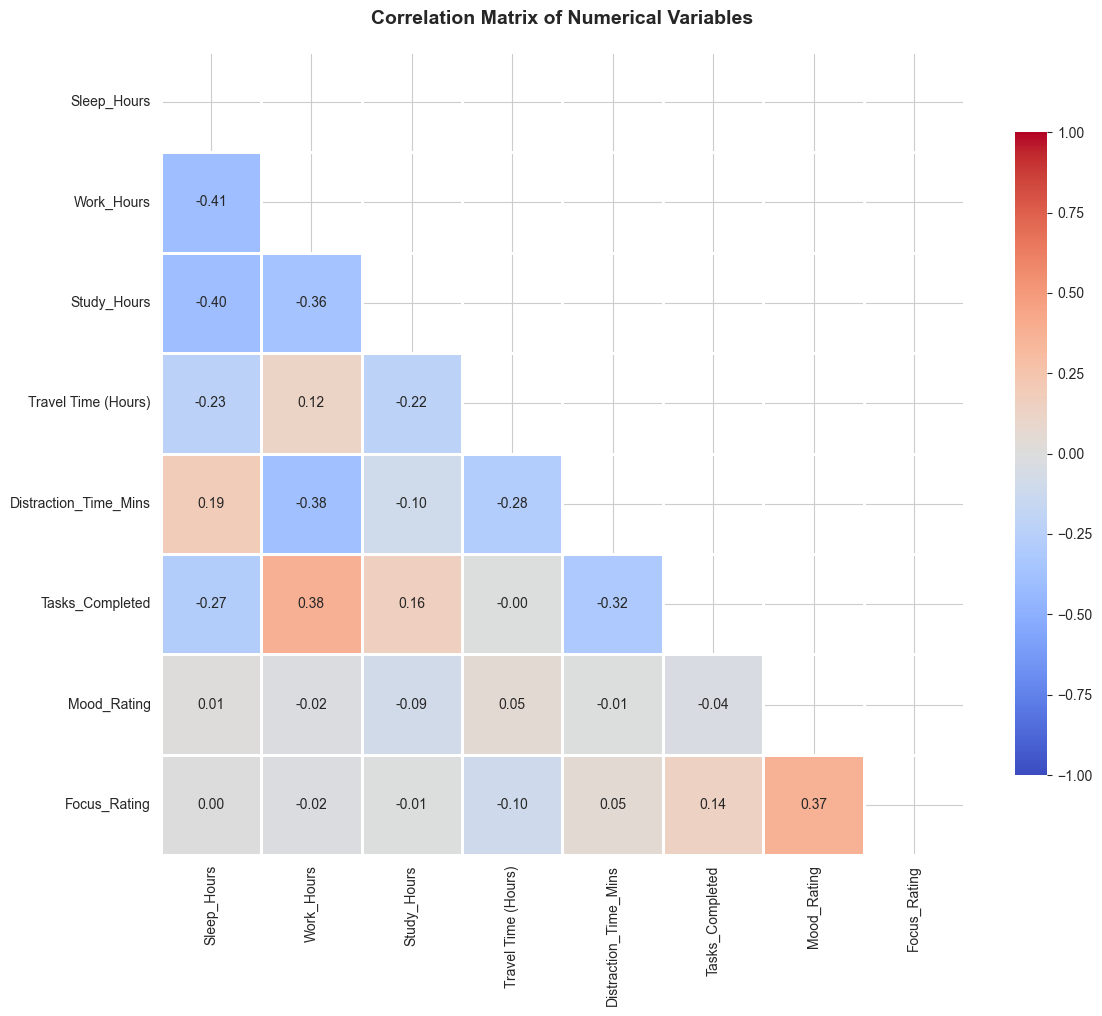

\nSignificant Correlations (p < 0.05):
Sleep_Hours ↔ Work_Hours: r = -0.406, p = 0.0001
Sleep_Hours ↔ Study_Hours: r = -0.404, p = 0.0001
Sleep_Hours ↔ Travel Time (Hours): r = -0.233, p = 0.0280
Sleep_Hours ↔ Tasks_Completed: r = -0.275, p = 0.0092
Work_Hours ↔ Study_Hours: r = -0.364, p = 0.0005
Work_Hours ↔ Distraction_Time_Mins: r = -0.384, p = 0.0002
Work_Hours ↔ Tasks_Completed: r = 0.378, p = 0.0003
Study_Hours ↔ Travel Time (Hours): r = -0.220, p = 0.0380
Travel Time (Hours) ↔ Distraction_Time_Mins: r = -0.285, p = 0.0068
Distraction_Time_Mins ↔ Tasks_Completed: r = -0.319, p = 0.0023
Mood_Rating ↔ Focus_Rating: r = 0.374, p = 0.0003
\nCorrelation matrix saved to figures/Figure_3_Correlation_Matrix.png
Total significant correlations: 11


In [18]:
# Calculate correlation matrix for numerical variables
correlation_vars = ['Sleep_Hours', 'Work_Hours', 'Study_Hours', 'Travel Time (Hours)', 
                    'Distraction_Time_Mins', 'Tasks_Completed', 'Mood_Rating', 'Focus_Rating']

corr_matrix = df[correlation_vars].corr(method='pearson')

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            mask=mask, ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('figures/Figure_3_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify significant correlations (p < 0.05)
print("\\nSignificant Correlations (p < 0.05):")
print("="*60)
significant_corrs = []
for i in range(len(correlation_vars)):
    for j in range(i+1, len(correlation_vars)):
        var1 = correlation_vars[i]
        var2 = correlation_vars[j]
        corr_coef, p_value = pearsonr(df[var1].dropna(), df[var2].dropna())
        if p_value < 0.05:
            significant_corrs.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlation': corr_coef,
                'P-value': p_value
            })
            print(f"{var1} ↔ {var2}: r = {corr_coef:.3f}, p = {p_value:.4f}")

if len(significant_corrs) == 0:
    print("No significant correlations found (p < 0.05)")

print(f"\\nCorrelation matrix saved to figures/Figure_3_Correlation_Matrix.png")
print(f"Total significant correlations: {len(significant_corrs)}")